## Project : Diabetes prediction

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


### 1. Import Packages


In [336]:
# Import necessary packages

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import confusion_matrix, accuracy_score


### 2. Import Data


In [309]:
# Import data

data = pd.read_csv("diabetes_prediction_dataset.csv")


### 3. Understand the data


In [310]:
data.shape


(100000, 9)

In [311]:
# Overview of the dataÒ
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [312]:
# Numerical
data[['age', "bmi", "HbA1c_level", "blood_glucose_level"]].describe()


,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [313]:
# Categorical
print(data["gender"].value_counts())
print(data["hypertension"].value_counts())
print(data["heart_disease"].value_counts())
print(data["smoking_history"].value_counts())
print(data["diabetes"].value_counts())


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
0    92515
1     7485
Name: hypertension, dtype: int64
0    96058
1     3942
Name: heart_disease, dtype: int64
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
0    91500
1     8500
Name: diabetes, dtype: int64


### 4. Preprocess


#### 4.1 NA values


In [314]:
# na values
data.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### 4.2 Encoding


In [315]:
# one hot encoding - gender
dummy1 = pd.get_dummies(data["gender"])
data_prepro = pd.concat([data, dummy1], axis=1)
data_prepro = data_prepro.drop("gender", axis=1)

# one hot encoding - smoking_history
dummy2 = pd.get_dummies(data_prepro["smoking_history"])
data_prepro = pd.concat([data_prepro, dummy2], axis=1)
data_prepro = data_prepro.drop("smoking_history", axis=1)

# Rearranging columns
data_prepro = data_prepro.drop(
    'diabetes', axis=1).join(data_prepro['diabetes'])

data_prepro


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other,No Info,current,ever,former,never,not current,diabetes
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1,0,0,1,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0,0
99998,24.0,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0,0


#### 4.3 Correlation


/var/folders/lc/929zw5910k93bhrggwjv333w0000gn/T/ipykernel_35842/582749974.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), xticklabels=data.corr().columns,
/var/folders/lc/929zw5910k93bhrggwjv333w0000gn/T/ipykernel_35842/582749974.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yticklabels=data.corr().columns, cmap='crest', annot=data.corr(), linewidths=1)


<function matplotlib.pyplot.show(close=None, block=None)>

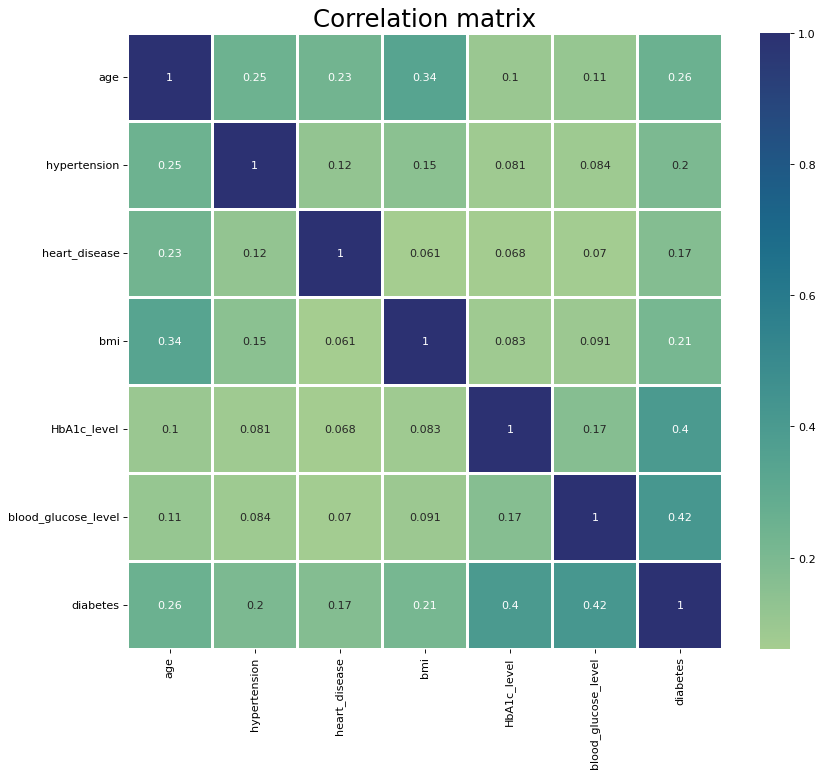

In [316]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns,
            yticklabels=data.corr().columns, cmap='crest', annot=data.corr(), linewidths=1)
plt.title("Correlation matrix", fontsize=22)
plt.show


### 5. Preparing Data


In [317]:
X = data_prepro.iloc[:, :-1]
y = data_prepro.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.Tensor(y_train.values).unsqueeze(1)
y_test = torch.Tensor(y_test.values).unsqueeze(1)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)


(100000, 15)
torch.Size([80000, 15])
torch.Size([20000, 15])
(100000,)
torch.Size([80000, 1])
torch.Size([20000, 1])


### 6. Model Architecture


#### 6.1 Parameters


In [318]:
# fixed paramaters
input_size = X_train.shape[1]
num_classes = 1
num_steps = X_train.shape[0]

# hyper parameters
hidden_size = [6, 6]
learn_rate = 0.005
num_epochs = 5


#### 6.2 Model


In [319]:
# Single layer neural network
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet1, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size[1], num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.layer3(out)
        out = self.sigmoid(out)
        return out


model = NeuralNet1(input_size, hidden_size, num_classes)


#### 6.3 Loss and Optimizer


In [320]:
# loss and optimizer
criterion = nn.BCELoss()  # CrossEntropyLoss() is only for multiclassification
optimizer = optim.Adam(model.parameters(), lr=learn_rate)


### 7. Train the model


In [321]:
for epoch in range(num_epochs):

    for i in range(num_steps):

        # Forward pass
        output = model(X_train[i, :])
        loss = criterion(output, y_train[i])

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 40000 == 0:
            print(
                f'epoch {epoch+1}/ {num_epochs}, step {i+1}/{num_steps}, loss = {loss.item():.6f}')


epoch 1/ 5, step 40000/80000, loss = 0.157905
epoch 1/ 5, step 80000/80000, loss = 0.025682
epoch 2/ 5, step 40000/80000, loss = 0.010159
epoch 2/ 5, step 80000/80000, loss = 0.015400
epoch 3/ 5, step 40000/80000, loss = 0.007872
epoch 3/ 5, step 80000/80000, loss = 0.009718
epoch 4/ 5, step 40000/80000, loss = 0.007303
epoch 4/ 5, step 80000/80000, loss = 0.007150
epoch 5/ 5, step 40000/80000, loss = 0.007310
epoch 5/ 5, step 80000/80000, loss = 0.005634


### 7. Evaluate model


In [338]:
with torch.no_grad():
    n_correct = 0
    n_samples = y_test.shape[0]

    y_pred = model(X_test)
    y_pred[y_pred <= 0.5] = 0
    y_pred[y_pred > 0.5] = 1

    # values, index
    n_correct = (y_pred == y_test).sum().item()

    acc = 100 * n_correct/n_samples
    print(f'Accuracy = {acc}')


Accuracy = 95.555


[[18012   280]
 [  609  1099]]
0.95555


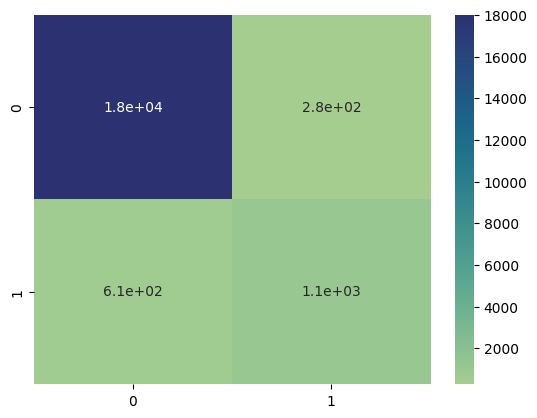

In [341]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="crest")
print(cm)
print(accuracy_score(y_test, y_pred))
